# Data Visualization: Ford Go Bike 

- Introduction
- I. Data Wrangling
- II. Univariate Exploration
- III. Bivariate Exploration
- IV. Multivariate Exploration
- V. Proposal for the next step
- VI. Reference

## Introduction:

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. Lyft acquired and rebranded the service in 2019. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase an access pass. 

Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data includes: Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

- Where do Ford GoBike Bikers ride? 
- How far do they go? 
- Which stations are most popular? 
- What time of day and days of the week are most rides taken on? 
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

We are going to use Python visualization libraries, including matplotlib and seaborn, to systematically explore Ford GoBike System Data dataset, starting from plots of single variables and building up to plots of multiple variables. Then, we are going to produce a presentation that illustrates interesting properties, trends, and relationships that will be discovered in the dataset.

## I. Data Wrangling: 

Before we can start with the exploratory data analysis through visualizations, our first step in data wrangling process is gathering data. 

### Step 1: Gathering Data:

In [662]:
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import calendar
import math
import datetime as dt

%matplotlib inline

In [663]:
# Display Ford GoBike csv file 
df = pd.read_csv('C:\\Users\\Pattu\\OneDrive\\Documents\\06. Udacity.Data Analyst\\04. Visualization\\Fordgobike\\201902-fordgobike-tripdata.csv')

### Step 2. Assessing Data:

After having gathered data, the next step is to assess the datset visually and programmatically to identify data quality issues as well as tidiness issues.

In [664]:
# Display first rows of the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [665]:
# Display last rows of the dataframe
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [668]:
# view the dimension of the dataset
df.shape

(183412, 16)

The dataset explores the Ford GoBike's trip data for public containing approximately 183,412 bike rides on february, 2019.

In [669]:
# View info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [670]:
# Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are 197 missing values for both start_station_id and start_station_name, and also for end_station_id and end_station_name. While there are 8265 missing values for both member_birth_year  and member_gender.

In [671]:
# Check for duplicated data
df.duplicated().sum()

0

In [672]:
# display statistic basic summary 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [673]:
# Display the number of bikes in the dataset
df.bike_id.nunique()

4646

In [674]:
# Check the number of customer and subscriber
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

**Quality issues:**

- **Q 1:** Missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name and also member_birth_year and member_gender.
- **Q 2:** Drop columns: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip
- **Q 3:** start_time and end_time should be datetime64 dtype instead of objects
- **Q 4:** user_type, member_gender and bike_share_for_all_trip can be set to category instead of objects
- **Q 5:** bike id, start_station_id, end_station_id can be set to object instead of dtype int64  
- **Q 6:**  member_birth_year should be set to int64 instead of dtype float64  
- **Q 7:** There are two variables in one column which violates the "each variable forms a column" requirement. 
- **Q 8:** For further analysis, a new column of age group should be created  

### Step 3. Cleaning Data:

Cleaning data is the third step in data wrangling process. We are going to fix the quality and tidiness issues that we have identified in the assessment step.

In [707]:
#create copy of original dataframe
df_clean = df.copy()

In [708]:
df_clean.shape

(183412, 16)

Programmatic data cleaning as its own separate process within data wrangling has 3 steps: **defining**, **coding** and **testing**. First of all, we'll define cleaning data plan in writing, then we'll translate it into code, and finally, we'll test the dataset often using code to make sure the cleaning code worked.

**Q 1:** Missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name and also member_birth_year and member_gender.

**Define:** Replace null values with NAN and rows with NaN values from our dataset

**Code:**

In [709]:
# replace null values with NAN
df_clean = df_clean.replace(0, np.NAN)

# drop all NAN's rows from our dataset
df_clean = df_clean.dropna()
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


**Test:**


In [710]:
# Check for missing values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Q 2:** Drop columns: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip

**Define:** Remove columns that won't be used for analysis using drop() method

**Code:**

In [711]:
# Drop unecessary columns
df_clean = df_clean.drop(columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'])
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male


**Test:**



In [712]:
df_clean.head(0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender


**Q 3:** start_time and end_time should be datetime64 dtype instead of objects

**Define:** Convert start_time and end_time from object to datetime format using pandas to_datetime() function.

**Code:**

In [713]:
# set dates to timestamps
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

**Q 4:** user_type, member_gender and bike_share_for_all_trip can be set to category instead of objects

**Define:** Convert user_type, member_gender and bike_share_for_all_trip to category using the astype() function

**Code:**    

In [714]:
# set user type, gender and bike_share_for_all_trip to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

**Q 5:** bike id, start_station_id, end_station_id can be set to object instead of dtype int64    

**Define:** Convert bike id, start_station_id, and end_station_id from an integer to object using the astype() function

**Code:**

In [715]:
# set bike id, start_station_id, end_station_id to object
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

**Q 6:**  member_birth_year should be set to int64 instead of dtype float64    

**Define:** Convert member_birth_year from float64 to int64​ using the astype() function

**Code:**

In [716]:
# set member_birth_year to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

**Test:**

In [717]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  object        
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  object        
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  object        
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  int32         
 10  member_gender       174952 non-null  category      
dtypes: category(2), datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 13.0+ MB


**Q 7:** There are two variables in one column which violates the "each variable forms a column" requirement. 

**Define:** Stripping date and time from the start_time and end_time

**Code:**

In [718]:
# stripping date and time from the start_time and end_time
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['start_time'] = df_clean['start_time'].dt.time
df_clean['end_time'] = df_clean['end_time'].dt.time

In [719]:
# set start_date and end_date to datetime
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])

**Test:**

In [720]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  object        
 2   end_time            174952 non-null  object        
 3   start_station_id    174952 non-null  object        
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  object        
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  object        
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  int32         
 10  member_gender       174952 non-null  category      
 11  start_date          174952 non-null  datetime64[ns]
 12  end_date            174952 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns

**Q 7:**    

**Define:** Create new columns for duration_hour and duration_min, and weekdays

**Code:**

In [721]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,end_date
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,2019-02-28,2019-03-01
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,2019-02-28,2019-03-01
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,2019-02-28,2019-03-01
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,2019-02-28,2019-03-01
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,2019-02-28,2019-03-01


In [722]:
# Create a new column for duration_hour and duration_min
df_clean['duration_min'] = df_clean['duration_sec'] / 60 
df_clean['duration_hour'] = df_clean['duration_sec'] / 3600

In [723]:
# extract day from start_time column
df_clean['weekday'] = df_clean['start_date'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

**Test:**

In [724]:
df_clean[['weekday','duration_hour', 'duration_min']].sample(5)

,weekday,duration_hour,duration_min
87336,Sun,0.249167,14.950000
100460,Thu,0.120000,7.200000
124881,Mon,0.094722,5.683333
17185,Wed,0.154444,9.266667
144350,Thu,0.146944,8.816667


In [725]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,end_date,duration_min,duration_hour,weekday
123075,1990,09:26:18.268000,09:59:28.434000,5.0,Powell St BART Station (Market St at 5th St),6.0,The Embarcadero at Sansome St,4391,Customer,1980,Male,2019-02-11,2019-02-11,33.166667,0.552778,Mon
31170,565,17:22:07.444000,17:31:32.522000,257.0,Fifth St at Delaware St,250.0,North Berkeley BART Station,3177,Subscriber,1954,Male,2019-02-24,2019-02-24,9.416667,0.156944,Sun
156403,469,07:57:49.126000,08:05:38.847000,349.0,Howard St at Mary St,102.0,Irwin St at 8th St,5502,Subscriber,1988,Male,2019-02-06,2019-02-06,7.816667,0.130278,Wed
70165,306,18:35:54.446000,18:41:00.866000,244.0,Shattuck Ave at Hearst Ave,254.0,Vine St at Shattuck Ave,1799,Subscriber,1986,Male,2019-02-19,2019-02-19,5.100000,0.085000,Tue
90428,254,12:42:39.285000,12:46:53.430000,71.0,Broderick St at Oak St,56.0,Koshland Park,4821,Subscriber,1976,Male,2019-02-16,2019-02-16,4.233333,0.070556,Sat


**Q 8:** For further analysis, a new column of age group should be created  

**Define:** Create new columns for member_age and age_group

**Code:**

In [726]:
# Create member_age column
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [727]:
# Create age group from member age
df_clean['age_group'] = df_clean['member_age'] .apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

**Test:**

In [728]:
# Test member age and their age_group
df_clean[['member_age','age_group']].sample(5)

,member_age,age_group
32124,21,20 - 30
13243,33,30 - 40
35478,37,30 - 40
138029,49,40 - 50
74700,28,20 - 30


In [729]:
# Drop NaN from age group
df_clean['age_group'].isna().any()

False

In [730]:
# Reorder the column placement 
col_list = list(df_clean.columns)
print(col_list)

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'start_date', 'end_date', 'duration_min', 'duration_hour', 'weekday', 'member_age', 'age_group']


In [731]:
# set the columns in a new order
col_list = ['bike_id', 'user_type', 'member_birth_year', 'member_age', 'age_group', 'member_gender','start_station_id','start_station_name', 
            'start_time','end_station_id', 'end_station_name','end_time', 'weekday','start_date','end_date','duration_hour', 'duration_min','duration_sec']

df_clean = df_clean[col_list]

# Confirm correction
df_clean.head(50)

,bike_id,user_type,member_birth_year,member_age,age_group,member_gender,start_station_id,start_station_name,start_time,end_station_id,end_station_name,end_time,weekday,start_date,end_date,duration_hour,duration_min,duration_sec
0,4902,Customer,1984,35,30 - 40,Male,21.0,Montgomery St BART Station (Market St at 2nd St),17:32:10.145000,13.0,Commercial St at Montgomery St,08:01:55.975000,Thu,2019-02-28,2019-03-01,14.495833,869.750000,52185
2,5905,Customer,1972,47,40 - 50,Male,86.0,Market St at Dolores St,12:13:13.218000,3.0,Powell St BART Station (Market St at 4th St),05:24:08.146000,Thu,2019-02-28,2019-03-01,17.181667,1030.900000,61854
3,6638,Subscriber,1989,30,20 - 30,Other,375.0,Grove St at Masonic Ave,17:54:26.010000,70.0,Central Ave at Fell St,04:02:36.842000,Thu,2019-02-28,2019-03-01,10.136111,608.166667,36490
4,4898,Subscriber,1974,45,40 - 50,Male,7.0,Frank H Ogawa Plaza,23:54:18.549000,222.0,10th Ave at E 15th St,00:20:44.074000,Thu,2019-02-28,2019-03-01,0.440278,26.416667,1585
5,5200,Subscriber,1959,60,50 - 60,Male,93.0,4th St at Mission Bay Blvd S,23:49:58.632000,323.0,Broadway at Kearny,00:19:51.760000,Thu,2019-02-28,2019-03-01,0.498056,29.883333,1793
6,3803,Subscriber,1983,36,30 - 40,Female,300.0,Palm St at Willow St,23:55:35.104000,312.0,San Jose Diridon Station,00:14:42.588000,Thu,2019-02-28,2019-03-01,0.318611,19.116667,1147
7,6329,Subscriber,1989,30,20 - 30,Male,10.0,Washington St at Kearny St,23:41:06.766000,127.0,Valencia St at 21st St,00:08:02.756000,Thu,2019-02-28,2019-03-01,0.448611,26.916667,1615
8,6548,Subscriber,1988,31,30 - 40,Other,10.0,Washington St at Kearny St,23:41:48.790000,127.0,Valencia St at 21st St,00:07:59.715000,Thu,2019-02-28,2019-03-01,0.436111,26.166667,1570
9,6488,Subscriber,1992,27,20 - 30,Male,19.0,Post St at Kearny St,23:49:47.699000,121.0,Mission Playground,00:07:17.025000,Thu,2019-02-28,2019-03-01,0.291389,17.483333,1049
10,5318,Subscriber,1996,23,20 - 30,Female,370.0,Jones St at Post St,23:57:57.211000,43.0,San Francisco Public Library (Grove St at Hyde...,00:05:35.435000,Thu,2019-02-28,2019-03-01,0.127222,7.633333,458


In [732]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   bike_id             174952 non-null  object        
 1   user_type           174952 non-null  category      
 2   member_birth_year   174952 non-null  int32         
 3   member_age          174952 non-null  int32         
 4   age_group           174952 non-null  object        
 5   member_gender       174952 non-null  category      
 6   start_station_id    174952 non-null  object        
 7   start_station_name  174952 non-null  object        
 8   start_time          174952 non-null  object        
 9   end_station_id      174952 non-null  object        
 10  end_station_name    174952 non-null  object        
 11  end_time            174952 non-null  object        
 12  weekday             174952 non-null  object        
 13  start_date          174952 no

# II. Univariate Exploration of Data:

**1. Bike Trip Duration:**

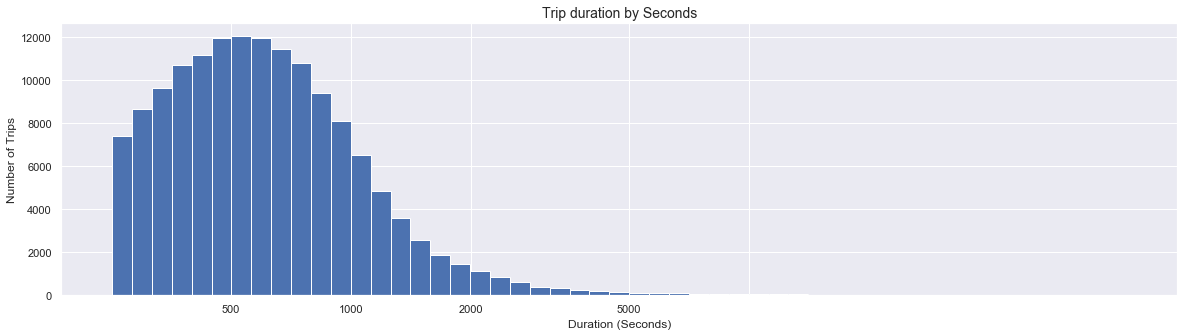

In [888]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: Bike Trip Duration by Seconds
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, 1000, 2000, 5000])

plt.title('Trip duration by Seconds', size=14)
plt.xlabel('Duration (Seconds)', size=12)
plt.ylabel('Number of Trips', size=12)
plt.show()

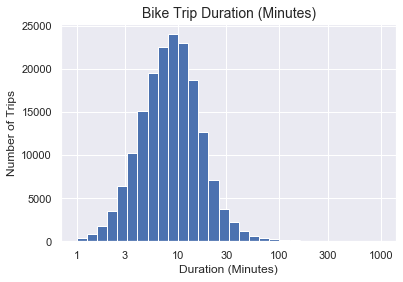

In [889]:
# histogram on right: Bike Trip Duration by Minutes

bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min' , bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title('Bike Trip Duration (Minutes)', size=14)
plt.ylabel('Number of Trips', size=12)
plt.xlabel('Duration (Minutes)', size=12);

In [890]:
df_clean['duration_min'].describe() 

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Most of the rides are short distance, there are within the range of 5mn to 15mn (300 sec to 900sec). The mean of bike rides is around 11.73 minutes. 

**3. Bike rides per user type:**

In [520]:
df_clean['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

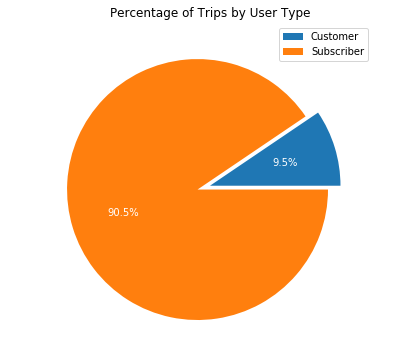

In [503]:
total_trips = df_clean['duration_sec'].count()
customer_trips = df_clean[df_clean['user_type']=='Customer']['duration_sec'].count() / total_trips
subscriber_trips = df_clean[df_clean['user_type']=='Subscriber']['duration_sec'].count() / total_trips

plt.figure(figsize=(6,6))
plt.pie([customer_trips,subscriber_trips], explode=(0, 0.1), labels=['Customer', 'Subscriber'], 
        autopct='%1.1f%%', startangle=0, textprops={'color':'white'})
plt.title("Percentage of Trips by User Type")
plt.legend()
plt.show()

According to the graph, we conclude that there are more subscribers (90.5% of the bikers) than customers (9.5%), which means that bikers prefer subscribing to the monthly memberships. 

**4. Number of Bike rides by sex:**

In [519]:
df_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

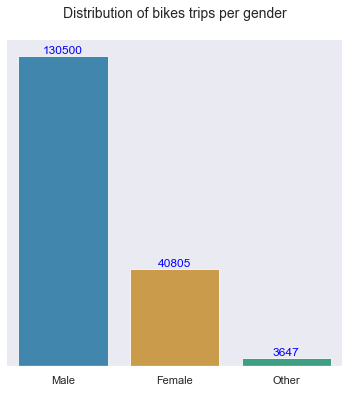

In [751]:
fig, ax = plt.subplots(figsize = (6,6))

sns.countplot(x = "member_gender", data = df_clean, 
              order = df_clean['member_gender'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha = 0.8)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+ p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "blue", size = 12)
plt.title('Distribution of bikes trips per gender\n', size=14)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

More men than women commute by bicycle.

**5. Bike rides by group of age:**

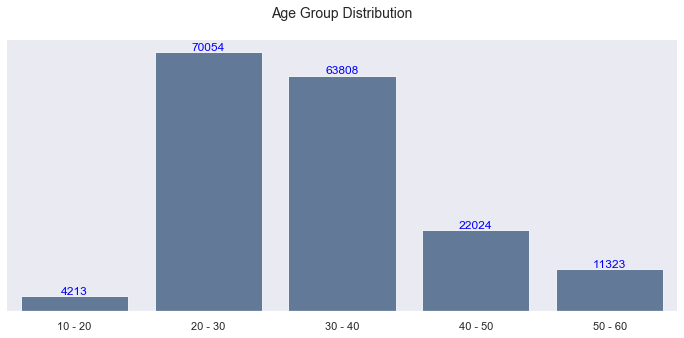

In [750]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "age_group", data = df_clean,
              color = sns.color_palette('viridis')[1],
              order = ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60'], alpha=0.8)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "blue", size=12)

plt.title('Age Group Distribution\n', size=14)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

Younger Commuters or urban residents in San Francisco in their 20-40 years old more likely to bike to their university or work at greater percentages than older.

**6. Bikes rides during weekdays:**

Text(0.5, 1.03, 'Number of Bike rides during Weekdays')

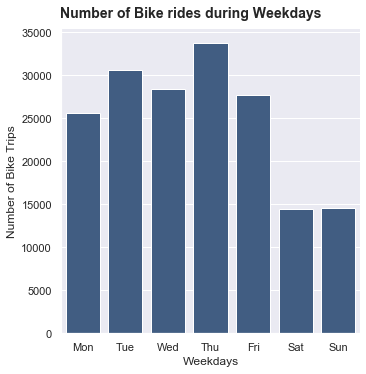

In [759]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
    
g = sns.catplot(data = df_clean, x ='weekday', kind = 'count', color = sns.color_palette('viridis')[1], order = weekday)

g.set_axis_labels("Weekdays", "Number of Bike Trips")
g.fig.suptitle('Number of Bike rides during Weekdays', y=1.03, fontsize=14, fontweight='semibold')

Notice that Bike sharing is mostly used during business or school days compared to weekend, which means that even in February supposed to be very cold on the other side of the US like New York commuters prefer using bike rides for their daily commute to workplaces and schools etc.

**7. Most popular starting station and ending station:**

In [843]:
# Display the name of start station
df_clean['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [844]:
# Subset the dataset by keeping only top 5 start station with high traffics
list_st_station = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                  'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)']
df_Top5 = df_clean.loc[df_clean['start_station_name'].isin(list_st_station)]
df_Top5['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

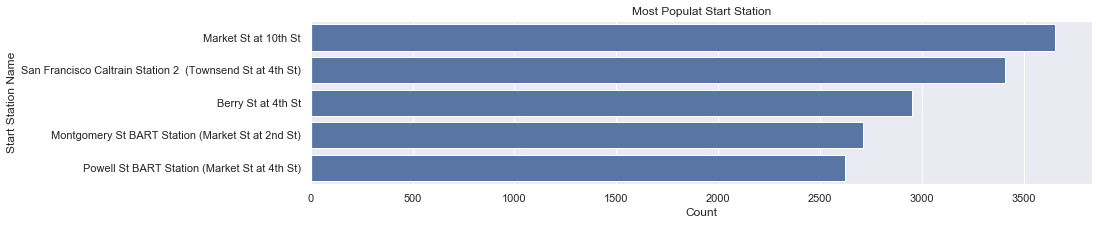

In [845]:
# Plot the most popular starting station
plt.figure(figsize = [14, 3])
base_color = sb.color_palette()[0]

st_stat_counts = df_Top5['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

sb.countplot(data = df_Top5, y = 'start_station_name', color = base_color, order = st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Most Populat Start Station');

In [847]:
df_clean['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

In [848]:
# Subset the dataset by keeping only top 5 end station 
list_end_station = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 
                   'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 
                   'San Francisco Caltrain (Townsend St at 4th St)']
df_Top5 = df_clean.loc[df_clean['end_station_name'].isin(list_end_station)]
df_Top5['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

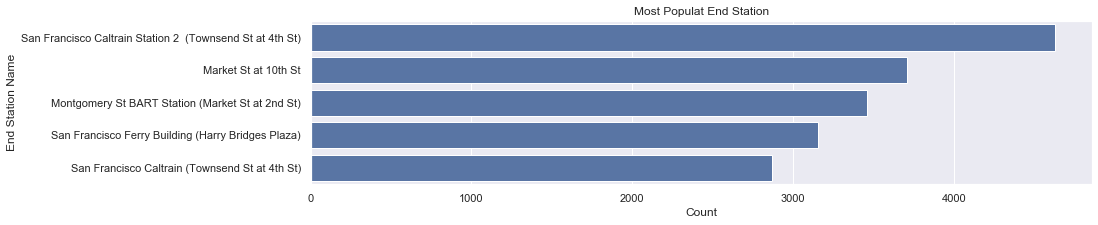

In [849]:
# Plot the most popular destination
plt.figure(figsize = [14, 3])
base_color = sb.color_palette()[0]

end_stat_counts = df_Top5['end_station_name'].value_counts()
end_stat_order = end_stat_counts.index

sb.countplot(data = df_Top5, y = 'end_station_name', color = base_color, order = end_stat_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Most Populat End Station');

The most popular stations are San Francisco Caltrain Station 2  (Townsend St at 4th St), Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), and also San Francisco Ferry Building (Harry Bridges Plaza) which are connceted to mass public transportation (Train, Bart and Ferry). Commuters look for cheaper alternative transportation to get to their destination (school, work or others), so they are not only using bike rides but also other means of public transportation. 